In [1]:
# import all the required libraries
import pandas as pd
from bs4 import BeautifulSoup
from nltk.tokenize import TweetTokenizer
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
import string
# nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load the tweets csv file
tweets_df = pd.read_csv('_us_elections2020.csv')

In [3]:
# information about the dataframe
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215231 entries, 0 to 215230
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   created_at            215231 non-null  object 
 1   id                    215231 non-null  int64  
 2   full_text             215231 non-null  object 
 3   source                215230 non-null  object 
 4   user.id               215231 non-null  int64  
 5   user.name             215224 non-null  object 
 6   user.location         150903 non-null  object 
 7   user.followers_count  215231 non-null  int64  
 8   user.lang             0 non-null       float64
dtypes: float64(1), int64(3), object(5)
memory usage: 14.8+ MB


In [4]:
# drop tweets that have the source column empty
tweets_df = tweets_df.dropna(subset = ['source'])

In [5]:
# get the source of the tweets
tweets_df['tweet_source'] = tweets_df['source'].apply(lambda x: BeautifulSoup(x).get_text())

In [6]:
# get all the tweets whose source starts with Twitter
# most of the tweets that are tweeted by humans have sources starting from twitter
x = tweets_df[tweets_df.tweet_source.str.startswith('Twitter') ==True]

In [7]:
# check the distribution of tweets amoung sources
y = pd.DataFrame(x.tweet_source.value_counts())
y

,tweet_source
Twitter for iPhone,62837
Twitter Web App,52192
Twitter for Android,38133
Twitter Web Client,25731
Twitter for iPad,11527
Twitter Media Studio,135
Twitter for Mac,107
Twitter for Advertisers,105
Twitterrific for iOS,91
Twitterrific for Mac,19


In [8]:
# we can see that the top 7 columns are human tweet sources
z = y.head(7)
devices = list(z.index)
devices

['Twitter for iPhone',
 'Twitter Web App',
 'Twitter for Android',
 'Twitter Web Client',
 'Twitter for iPad',
 'Twitter Media Studio',
 'Twitter for Mac']

In [9]:
# only keep tweets that are made by humans
tweets_df = tweets_df[tweets_df['tweet_source'].isin(devices)]
tweets_df.shape

(190662, 10)

In [10]:
# to process data for sentiment analysis first preprocessing is required
# tokenize the tweets
tweets_df['tokens']=tweets_df['full_text'].apply(TweetTokenizer().tokenize)

In [11]:
# remove the words like 'is','of','are', etc. that are not useful
stopwords_vocabulary = stopwords.words('english')
tweets_df['stopwords'] = tweets_df['tokens'].apply(lambda x:[i for i in x if i.lower() not in stopwords_vocabulary])

In [12]:
# remove punctuation
punctuations = list(string.punctuation)
tweets_df['punctuation'] = tweets_df['stopwords'].apply(lambda x: [i for i in x if i[0] not in punctuations])
tweets_df['digits'] = tweets_df['punctuation'].apply(lambda x: [i for i in x if i[0] not in list(string.digits)])
tweets_df['final'] = tweets_df['digits'].apply(lambda x: [i for i in x if len(i)>1])

In [13]:
# define the function
sentiment = SentimentIntensityAnalyzer()
# get the compound scores using the analyser
tweets_df['sentiment'] = tweets_df.full_text.apply(lambda x: sentiment.polarity_scores(x)['compound'])

In [14]:
# define positive, negative and neutral score to plot data
pos = len(tweets_df[tweets_df.sentiment > 0])
neg = len(tweets_df[tweets_df.sentiment < 0])
neu = len(tweets_df[tweets_df.sentiment == 0])

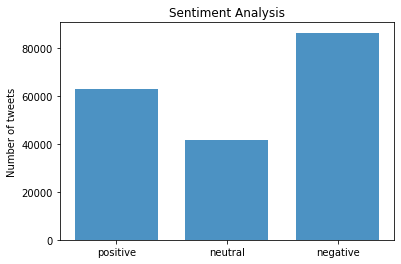

In [15]:
# plot a bar graph to show the distribution
y = [pos, neu, neg]
plt.title('Sentiment Analysis')
plt.ylabel('Number of tweets')
plt.xticks(range(len(y)),['positive','neutral','negative'])
plt.bar(range(len(y)),height = y,width = 0.75, align = 'center',alpha = 0.8 )
plt.show()